# Exploratory data analysis of a dataset of bestsellers with categories on Amazon from the year 2009 to 2019

*<font size="5">By Himani Desai</font>*

**<font size="4">The below couple of cells have been used for imports of required python libraries, extracting the data from a csv file and saving it to a dataframe and analyzing the variables.</font>**

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [140]:
amazon_book_reviews = pd.read_csv('bestsellers with categories.csv')

In [141]:
amazon_book_reviews.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [142]:
amazon_book_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


**<font size="4"> Highest rated book every year segregated by Year </font>**

In [143]:
amazon_book_reviews.groupby('Year').max()[['Name','Author','User Rating']]

,Name,Author,User Rating
Year,,,
2009,Where the Wild Things Are,Zhi Gang Sha,4.8
2010,Women Food and God: An Unexpected Path to Almo...,Tony Hsieh,4.8
2011,What to Expect When You're Expecting,Walter Isaacson,4.9
2012,Winter of the World: Book Two of the Century T...,William Davis,4.9
2013,Wonder,Zhi Gang Sha,4.9
2014,Wonder,Veronica Roth,4.9
2015,Wonder,Thug Kitchen,4.9
2016,You Are a Badass: How to Stop Doubting Your Gr...,Thug Kitchen,4.9
2017,You Are a Badass: How to Stop Doubting Your Gr...,Wizards RPG Team,4.9


**<font size="4">Lowest rated book every year segregated by year</font>**

In [144]:
amazon_book_reviews.groupby('Year').min()[['Name','Author','User Rating']]

,Name,Author,User Rating
Year,,,
2009,"Act Like a Lady, Think Like a Man: What Men Re...",Alan Moore,4.0
2010,A Patriot's History of the United States: From...,Abraham Verghese,4.0
2011,11/22/63: A Novel,Abraham Verghese,4.0
2012,Barefoot Contessa Foolproof: Recipes You Can T...,American Psychological Association,3.3
2013,Allegiant,Allie Brosh,3.8
2014,A Game of Thrones / A Clash of Kings / A Storm...,Alice Schertle,3.9
2015,Adult Coloring Book: Stress Relieving Animal D...,American Psychological Association,3.6
2016,10-Day Green Smoothie Cleanse,Adult Coloring Book Designs,4.0
2017,1984 (Signet Classics),Adam Gasiewski,4.0


**<font size="4">Authors with the highest average rating in 2018 and 2019</font>**

In [145]:
amazon_book_reviews[(amazon_book_reviews['Year']== 2018)| (amazon_book_reviews['Year']== 2019)].groupby('Author').mean(['User Rating']).sort_values(by = 'User Rating').head()


,User Rating,Reviews,Price,Year
Author,,,,
Michael Wolff,4.2,13677.0,6.0,2018.0
Laurel Randolph,4.3,7368.0,7.0,2018.0
James Patterson,4.3,10191.0,18.0,2018.0
Kevin Kwan,4.3,6143.0,8.0,2018.0
Howard Stern,4.3,5272.0,16.0,2019.0


**<font size="4">Top 5 Authors with highest average rating between 2009 and 2019</font>**

In [146]:
amazon_book_reviews.groupby('Author').mean(['Reviews']).reset_index()[['Author', 'User Rating']].sort_values(by ='User Rating', ascending = False).head()

,Author,User Rating
123,Jill Twiss,4.9
173,Nathan W. Pyle,4.9
41,Chip Gaines,4.9
206,Rush Limbaugh,4.9
26,Bill Martin Jr.,4.9


**<font size="4">Correlation between different attributes in the datasets</font>**

In [147]:
amazon_book_reviews.corr()

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


**<font size="4">Number of books segregated by genre</font>**

In [148]:
amazon_book_reviews['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

**<font size="4">The below dataframe indicates books which have above average user rating and reviews in the genre 'fiction'</font>**

In [149]:
amazon_book_reviews[(amazon_book_reviews['User Rating'] > 4.8) & (amazon_book_reviews['Reviews'] > 12000) & (amazon_book_reviews['Genre'] == 'Fiction')].sort_values(by=['User Rating','Author'], ascending = False)

,Name,Author,User Rating,Reviews,Price,Year,Genre
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction
476,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2013,Fiction
477,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2014,Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
479,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2016,Fiction
480,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2017,Fiction
481,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2018,Fiction
482,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2019,Fiction
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
246,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2013,Fiction


**<font size="4">The below dataframe indicates books which have above average user rating and reviews in the genre 'non-fiction'</font>**

In [150]:
amazon_book_reviews[(amazon_book_reviews['User Rating'] > 4.8) & (amazon_book_reviews['Reviews'] > 12000) & (amazon_book_reviews['Genre'] == 'Non Fiction')].sort_values(by=['User Rating','Author'], ascending = False)

,Name,Author,User Rating,Reviews,Price,Year,Genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction
188,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2012,Non Fiction
189,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2013,Non Fiction
190,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2014,Non Fiction
191,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2015,Non Fiction
192,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2016,Non Fiction


**<font size="4">Mean price of the books in each genre</font>**

In [151]:
amazon_book_reviews.groupby('Genre').mean('Price').reset_index()[['Genre','User Rating','Reviews']]

,Genre,User Rating,Reviews
0,Fiction,4.648333,15683.791667
1,Non Fiction,4.595161,9065.145161


**<font size="4">Authors whose books have highest price in the period between 2009 to 2019, on average</font>**

In [152]:
amazon_book_reviews.groupby('Author').mean('Price').reset_index().sort_values(by = 'Price', ascending = False)[['Author','User Rating','Reviews','Price']].head(5)

,Author,User Rating,Reviews,Price
10,American Psychiatric Association,4.5,6679.0,105.0
146,Lin-Manuel Miranda,4.9,5867.0,54.0
28,Bill Simmons,4.7,858.0,53.0
11,American Psychological Association,4.5,8580.0,46.0
6,Alan Moore,4.8,3829.0,42.0


**<font size="4">Authors whose books have lowest price in the period between 2009 to 2019, on average</font>**

In [153]:
amazon_book_reviews.groupby('Author').mean('Price').reset_index().sort_values(by = 'Price')[['Author','User Rating','Reviews','Price']].head(5)

,Author,User Rating,Reviews,Price
8,Alice Schertle,4.90,1884.0,0.0
189,RH Disney,4.65,2310.0,0.0
67,Delegates of the Constitutional,4.80,2774.0,0.0
30,Bob Woodward,4.40,6042.0,2.0
143,Larry Schweikart,4.60,460.0,2.0


**<font size="4">Books which contain the word 'Kids' in their title</font>**

In [154]:
amazon_book_reviews[amazon_book_reviews['Name'].str.contains('Kids')]

,Name,Author,User Rating,Reviews,Price,Year,Genre
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
74,Difficult Riddles For Smart Kids: 300 Difficul...,M Prefontaine,4.6,7955,5,2019,Non Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction
147,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2013,Fiction
204,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2013,Non Fiction
205,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2014,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
208,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2013,Non Fiction
209,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2014,Non Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction


**<font size="4">Books which contain the word 'Help' in their title</font>**

In [155]:
amazon_book_reviews[amazon_book_reviews['Name'].str.contains('Help')]

,Name,Author,User Rating,Reviews,Price,Year,Genre
402,The Help,Kathryn Stockett,4.8,13871,6,2009,Fiction
403,The Help,Kathryn Stockett,4.8,13871,6,2010,Fiction
404,The Help,Kathryn Stockett,4.8,13871,8,2011,Fiction
405,The Help,Kathryn Stockett,4.8,13871,7,2011,Fiction
449,The Plant Paradox Cookbook: 100 Delicious Reci...,Dr. Steven R Gundry MD,4.5,3601,18,2018,Non Fiction
536,Whose Boat Is This Boat?: Comments That Don't ...,The Staff of The Late Show with,4.6,6669,12,2018,Non Fiction


**<font size="4"> A new variable 'Popular/Not Popular' has been created. If the book consists on greater than average
reviews(greater than 12000, then the book is categorized as 'Popular' and vice verse</font>**

In [156]:
amazon_book_reviews['Popular/Not Popular'] = amazon_book_reviews['Reviews'].map(lambda x: 'Popular' if x > 12000 else 'Unpopular')

amazon_book_reviews.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre,Popular/Not Popular
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,Popular
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,Unpopular
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,Popular
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,Popular
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,Unpopular
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction,Popular
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction,Popular
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction,Popular
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction,Unpopular
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction,Popular


**<font size="3"> A new variable 'Price' has been created. It is classified as follows:</font>**
**<font size="3">1. If the price equals to 0, the variable returns 'Free'</font>**
**<font size="3">2. If the price is less than/equal to average but greater than 0, return 'Inexpensive'</font>**
**<font size="3">3. If the price is greater than average but less than the 75th percentile, return 'Average' </font>**
**<font size="3">4. If the price is greater than 75th Percentile , return 'Expensive'</font>**

In [157]:
def pricerange(x):
    if x == 0:
        return 'Free'
    elif x<=7 and x > 0:
        return 'Inexpensive'
    elif x>7 and x<=11:
        return 'Average'
    else:
        return 'Expensive'
    


amazon_book_reviews['Price Range'] = amazon_book_reviews['Price'].apply(lambda x: pricerange(x))
amazon_book_reviews.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Popular/Not Popular,Price Range
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,Popular,Average
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,Unpopular,Expensive
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,Popular,Expensive
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,Popular,Inexpensive
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,Unpopular,Expensive


**<font size="4"> Number of books categorized the variable 'Price Range' </font>**

In [158]:
amazon_book_reviews.groupby('Price Range').count().reset_index()

,Price Range,Name,Author,User Rating,Reviews,Price,Year,Genre,Popular/Not Popular
0,Average,153,153,153,153,153,153,153,153
1,Expensive,249,249,249,249,249,249,249,249
2,Free,12,12,12,12,12,12,12,12
3,Inexpensive,136,136,136,136,136,136,136,136


**<font size="4">Mean price of 'Popular' and 'Not Popular' books</font>**

In [159]:
round(amazon_book_reviews.groupby('Popular/Not Popular').mean('Price')[['Price']],1)

,Price
Popular/Not Popular,
Popular,10.7
Unpopular,14.3


**<font size="3"> A new variable 'Rating Category' has been created. It is classified as follows:</font>**
**<font size="3">1. If the rating is less than/equal to 4.5, the variable returns 'Low Rating'</font>**
**<font size="3">2. If the rating is less than/equal to 4.7 but greater than 4.5, return 'Average Rating'</font>**
**<font size="3">3. If the rating is greater than 4.7 return 'High Rating' </font>**


In [160]:
def RatingCat(rating):
    if rating <=4.5:
        return 'Low Rating'
    elif rating <= 4.7 and rating > 4.5:
        return 'Average Rating'
    else:
        return 'High Rating'
    
amazon_book_reviews['Rating Category'] = amazon_book_reviews['User Rating'].map(lambda rating: RatingCat(rating))   

amazon_book_reviews.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Popular/Not Popular,Price Range,Rating Category
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,Popular,Average,Average Rating
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,Unpopular,Expensive,Average Rating
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,Popular,Expensive,Average Rating
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,Popular,Inexpensive,Average Rating
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,Unpopular,Expensive,High Rating


**<font size="3">The count of books classified by Rating Category</font>**

In [161]:
amazon_book_reviews.groupby('Rating Category').count()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Popular/Not Popular,Price Range
Rating Category,,,,,,,,,
Average Rating,213,213,213,213,213,213,213,213,213
High Rating,179,179,179,179,179,179,179,179,179
Low Rating,158,158,158,158,158,158,158,158,158


**<font size="3">The below dataframe indicates list of books which are popular, belong to the inexpensive price range, have a high rating in 2019</font>**

In [162]:
amazon_book_reviews[(amazon_book_reviews['Popular/Not Popular'] == 'Popular') & (amazon_book_reviews['Price Range']== 'Inexpensive') &  (amazon_book_reviews['Rating Category']== 'High Rating') & (amazon_book_reviews['Year'] == 2019)]

,Name,Author,User Rating,Reviews,Price,Year,Genre,Popular/Not Popular,Price Range,Rating Category
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction,Popular,Inexpensive,High Rating
127,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2019,Fiction,Popular,Inexpensive,High Rating
179,If Animals Kissed Good Night,Ann Whitford Paul,4.8,16643,4,2019,Fiction,Popular,Inexpensive,High Rating
294,School Zone - Big Preschool Workbook - Ages 4 ...,School Zone,4.8,23047,6,2019,Non Fiction,Popular,Inexpensive,High Rating
482,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2019,Fiction,Popular,Inexpensive,High Rating
491,The Wonky Donkey,Craig Smith,4.8,30183,4,2019,Fiction,Popular,Inexpensive,High Rating
509,To Kill a Mockingbird,Harper Lee,4.8,26234,7,2019,Fiction,Popular,Inexpensive,High Rating


**<font size="3">Count of popular and unpopular books</font>**

<AxesSubplot:xlabel='Popular/Not Popular', ylabel='count'>

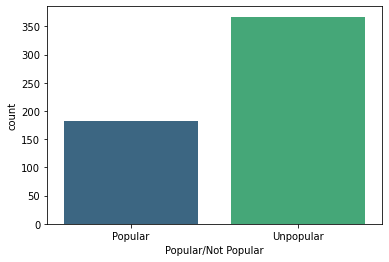

In [165]:
sns.countplot(x = 'Popular/Not Popular', data = amazon_book_reviews, palette = 'viridis')

**<font size="3">Count by rating category</font>**

<AxesSubplot:xlabel='Rating Category', ylabel='count'>

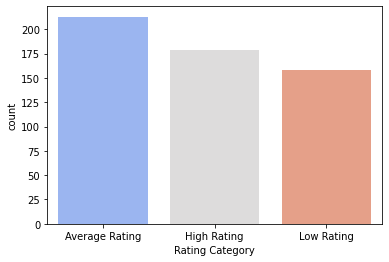

In [166]:
sns.countplot(x = 'Rating Category', data = amazon_book_reviews, palette = 'coolwarm')

**<font size="3">Histogram plot of prices of the books on amazon</font>**

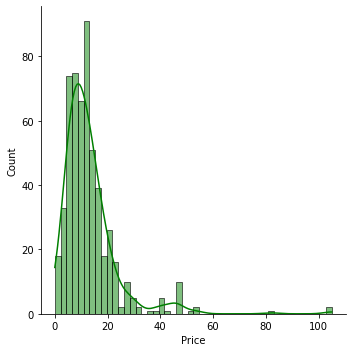

In [167]:
sns.displot(amazon_book_reviews['Price'] , kde = True, color = 'green')
plt.show()

**<font size="3">Bar plot indicating the reviews per year.</font>**

<AxesSubplot:xlabel='Year', ylabel='Reviews'>

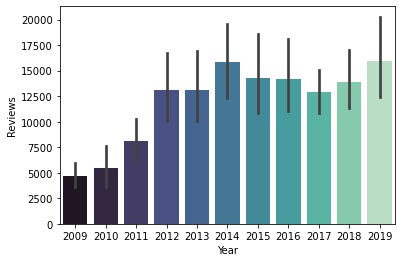

In [168]:
sns.barplot(x ='Year', y = 'Reviews', data = amazon_book_reviews, palette = 'mako')

**<font size="3">A facetgrid indicating the distribution of reviews for each of the price ranges for all genres</font>**

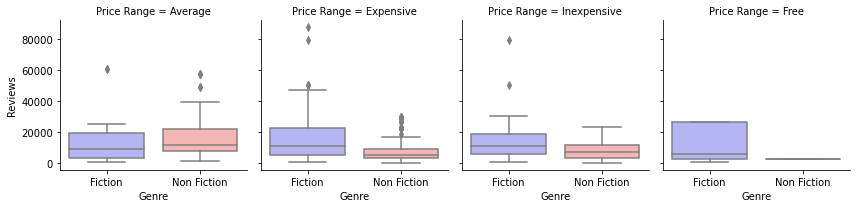

In [169]:
g = sns.FacetGrid(data = amazon_book_reviews , col = 'Price Range')
g.map(sns.boxplot, 'Genre', 'Reviews', palette = 'bwr')
plt.show()

**<font size="3">The below box plots indicate distribution of user rating for popular and unpopular books</font>**

<AxesSubplot:xlabel='Popular/Not Popular', ylabel='User Rating'>

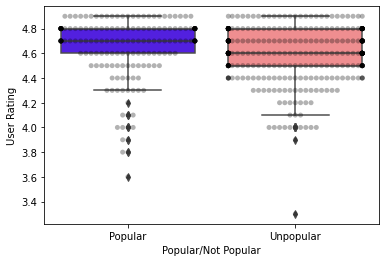

In [170]:
sns.boxplot(x = 'Popular/Not Popular', y ='User Rating', data = amazon_book_reviews, palette= 'gnuplot2')
sns.swarmplot(x = 'Popular/Not Popular', y ='User Rating', data = amazon_book_reviews, color= 'black', alpha = 0.3 )

**<font size="3">A regression plot describing the correlation of reviews and prices with a hue of popular and unpopular movies</font>**

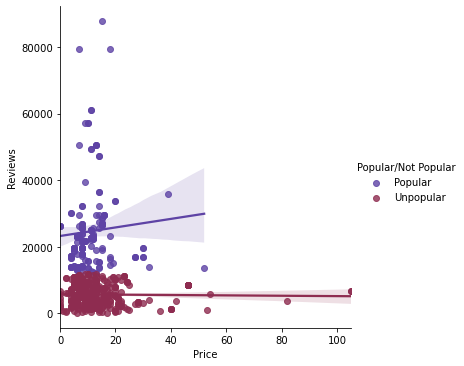

In [171]:
sns.lmplot(data = amazon_book_reviews, x = 'Price', y = 'Reviews', hue = 'Popular/Not Popular', palette = 'twilight')

**<font size="3">The below pairplot indicates the correlation between each of the variables in the Amazon book reviews dataframe </font>**

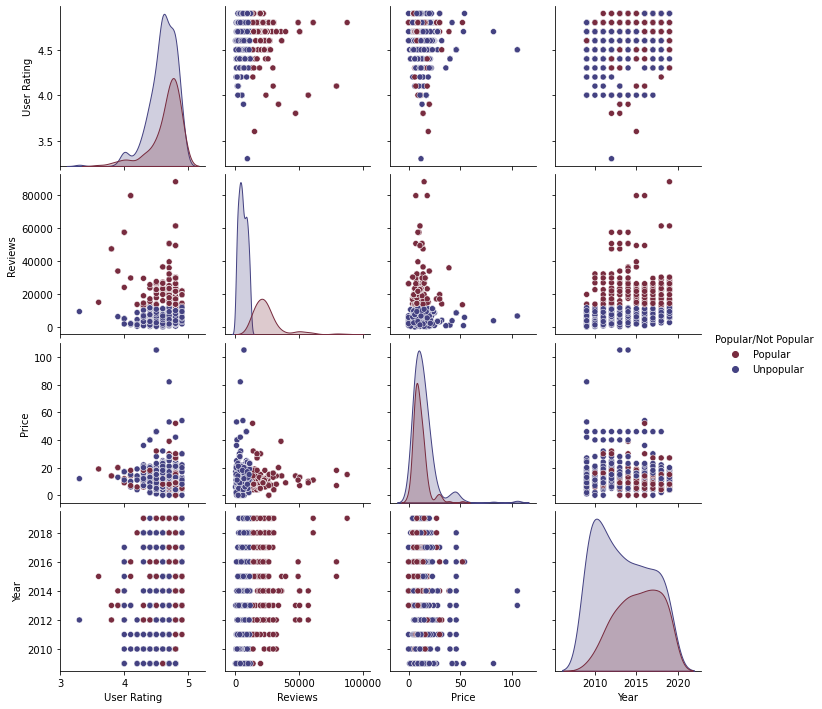

In [172]:
sns.pairplot(amazon_book_reviews, hue = 'Popular/Not Popular', palette = 'icefire_r')

**<font size="3">The heatmap indicates the correlation between each of the variables through the colorscale and the annotations on the map</font>**

<AxesSubplot:>

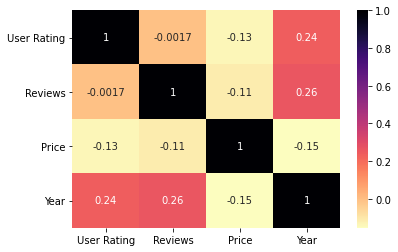

In [173]:
sns.heatmap(amazon_book_reviews.corr(), cmap = "magma_r", annot= True)